# 필요한 라이브러리 불러오기

In [12]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


# 데이터 불러오기

In [15]:
users_df = pd.read_csv('train_users_2.csv') # 전처리된 데이터 불러오기
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [16]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [3]:
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


# users_df 전처리
- 18~122세 이외의 age -> null처리
- 범주형인데 object 타입 -> category 타입으로 변환
- date_account_created, date_first_booking : datetime 타입으로 변환 (%Y-%m-%d 형식)
- timestamp_first_active : datetime 타입으로 변환 (%Y-%m-%d %H:%M:%S 형식)

In [17]:
# age 컬럼에서 18세 이상 122세 이하의 값을 제외한 나머지 값을 null로 처리
users_df.loc[(users_df['age'] < 18) | (users_df['age'] > 122), 'age'] = np.nan

users_df.age.isnull().sum()

88929

In [18]:
# 변환할 컬럼 지정
columns_to_convert = [
    'gender', 'signup_method', 'language', 'affiliate_channel', 
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
    'first_device_type', 'first_browser', 'country_destination'
]

for column in columns_to_convert:
    users_df[column] = users_df[column].astype('category')

print(users_df.dtypes)

id                           object
date_account_created         object
timestamp_first_active        int64
date_first_booking           object
gender                     category
age                         float64
signup_method              category
signup_flow                   int64
language                   category
affiliate_channel          category
affiliate_provider         category
first_affiliate_tracked    category
signup_app                 category
first_device_type          category
first_browser              category
country_destination        category
dtype: object


In [19]:
# date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'])

# timestamp_first_active는 타임스탬프 형식으로 되어있으므로 변환
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [20]:
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [21]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  category      
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [4]:
# 'id' 컬럼 값의 개수
num_users_ids = users_df['id'].nunique()

# 'user_id' 컬럼의 유니크한 값의 개수
num_session_user_ids = sessions_df['user_id'].nunique()

# 비교 결과 출력
print(f"Users DataFrame의 'id' 값의 개수: {num_users_ids}")
print(f"Sessions DataFrame의 'user_id' 유니크한 값의 개수: {num_session_user_ids}")

# 동일한지 여부 확인
if num_users_ids == num_session_user_ids:
    print("두 데이터프레임의 값의 개수가 동일합니다.")
else:
    print("두 데이터프레임의 값의 개수가 동일하지 않습니다.")

Users DataFrame의 'id' 값의 개수: 213451
Sessions DataFrame의 'user_id' 유니크한 값의 개수: 135483
두 데이터프레임의 값의 개수가 동일하지 않습니다.


# 세션 타임스탬프 만들기
1. sessions_df와 users_df를 유저id 기준으로 LEFT JOIN한다.
2. 각 유저id별로 timestamp_first_active(첫 번째 활동의 타임스탬프)에 secs_elapsed(해당 이벤트부터 다음 이벤트까지 세션 경과시간)을 더해서 session_timestamp 컬럼을 새롭게 생성해 그곳에 정보를 담는다.

In [22]:
# 데이터 병합
users_df.rename(columns={'id': 'user_id'}, inplace=True)
merged_df = sessions_df.merge(users_df[['user_id', 'date_account_created', 'date_first_booking', 'timestamp_first_active']], on='user_id', how='left')

merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0,2014-01-01,2014-01-04,2014-01-01 00:09:36


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 725.6+ MB


In [24]:
# 세션 타임스탬프 계산
merged_df['session_timestamp'] = merged_df['timestamp_first_active'] + pd.to_timedelta(merged_df['secs_elapsed'], unit='s')
merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,session_timestamp
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:55
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 18:58:49
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:37
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 06:18:37
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:16:51
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 02:17:59
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:11:31
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:23:27
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 05:56:58
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:20:59


In [25]:
# user_id가 'd1mm9tcy42'인 행들을 필터링하여 특정 컬럼만 선택
filtered_df = merged_df[merged_df['user_id'] == 'd1mm9tcy42']

filtered_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,session_timestamp
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:55
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 18:58:49
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:37
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 06:18:37
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:16:51
...,...,...,...,...,...,...,...,...,...,...
122,d1mm9tcy42,similar_listings,data,similar_listings,Windows Desktop,137.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:11:53
123,d1mm9tcy42,ajax_refresh_subtotal,click,change_trip_characteristics,Windows Desktop,791.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:22:47
124,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,73.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:10:49
125,d1mm9tcy42,show,NaN,NaN,Windows Desktop,947.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:25:23


# DAU, MAU, WAU 계산

## 1) DAU (Daily Active Users, 일별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 일별 집계한 값

In [29]:
# 세션 타임스탬프에서 날짜만 추출
merged_df['session_date'] = merged_df['session_timestamp'].dt.date

dau = merged_df.groupby(['session_date'], as_index=False).agg({'user_id': pd.Series.nunique})
dau = dau.rename(index=str, columns={'session_date': 'date', 'user_id': 'dau'})

dau.head(10)

,date,dau
0,2014-01-01,134
1,2014-01-02,400
2,2014-01-03,593
3,2014-01-04,644
4,2014-01-05,698
5,2014-01-06,796
6,2014-01-07,854
7,2014-01-08,881
8,2014-01-09,990
9,2014-01-10,1051


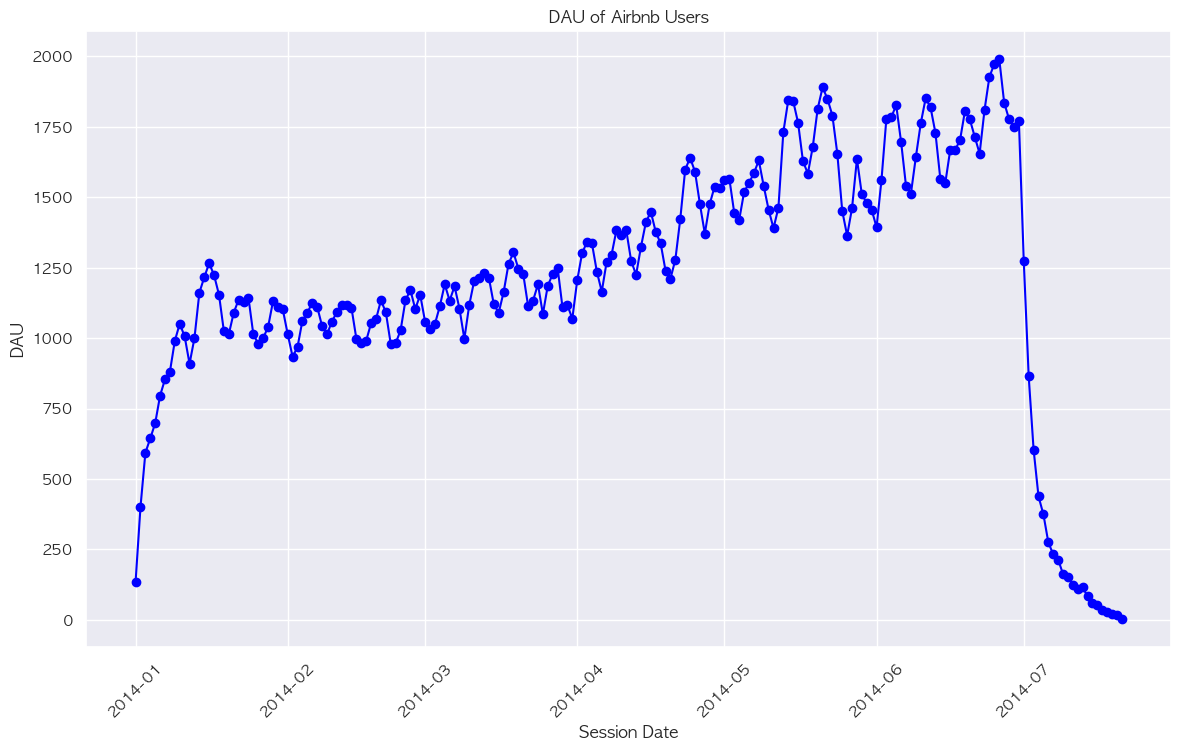

In [30]:
# DAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(dau['date'], dau['dau'], color='blue', marker='o')
plt.xlabel('Session Date')
plt.ylabel('DAU')
plt.title('DAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2) WAU (Weekly Active Users; 주별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 주별 집계한 값

In [31]:
# 세션 타임스탬프에서 추출한 날짜를 DatetimeIndex로 변환 (이렇게 하면 시간 연산 쉽게 할 수 있음)
merged_df['session_date'] = pd.to_datetime(merged_df['session_date'])

# 주간 단위로 유니크한 유저 수 집계 (resample : 주 단위로 데이터 그룹화하고 고유한 인원수 계산)
wau = merged_df.set_index('session_date').resample('W').agg({'user_id': pd.Series.nunique}).reset_index()
wau = wau.rename(columns={'session_date': 'date', 'user_id': 'wau'})

wau.head(10)

,date,wau
0,2014-01-05,1263
1,2014-01-12,2992
2,2014-01-19,3789
3,2014-01-26,3729
4,2014-02-02,3652
5,2014-02-09,3686
6,2014-02-16,3662
7,2014-02-23,3579
8,2014-03-02,3819
9,2014-03-09,3866


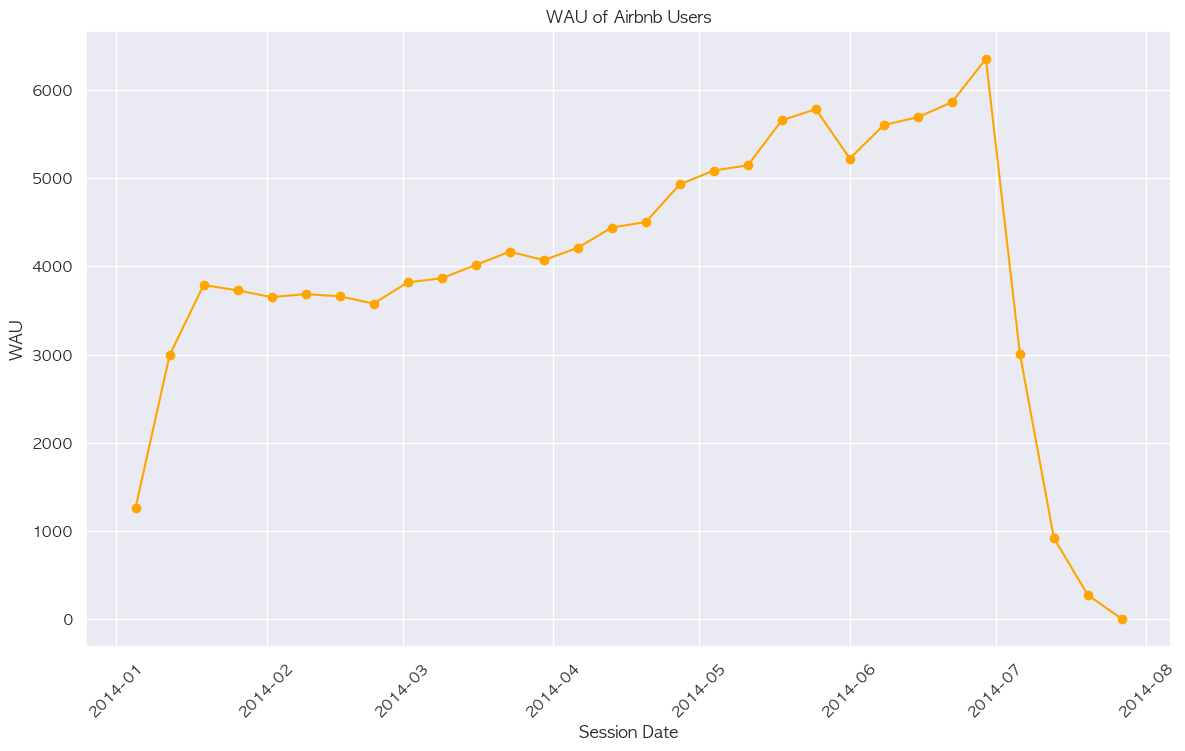

In [38]:
# WAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(wau['date'], wau['wau'], color='orange', marker='o')
plt.xlabel('Session Date')
plt.ylabel('WAU')
plt.title('WAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3) MAU (Monthly Active Users; 월별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 월별 집계한 값

In [35]:
# 월간 단위로 유니크한 유저 수 집계
mau = merged_df.set_index('session_date').resample('M').agg({'user_id': pd.Series.nunique}).reset_index()
mau = mau.rename(columns={'session_date': 'date', 'user_id': 'mau'})

mau.head(10)

,date,mau
0,2014-01-31,10111
1,2014-02-28,10867
2,2014-03-31,12623
3,2014-04-30,14302
4,2014-05-31,16890
5,2014-06-30,17985
6,2014-07-31,2839


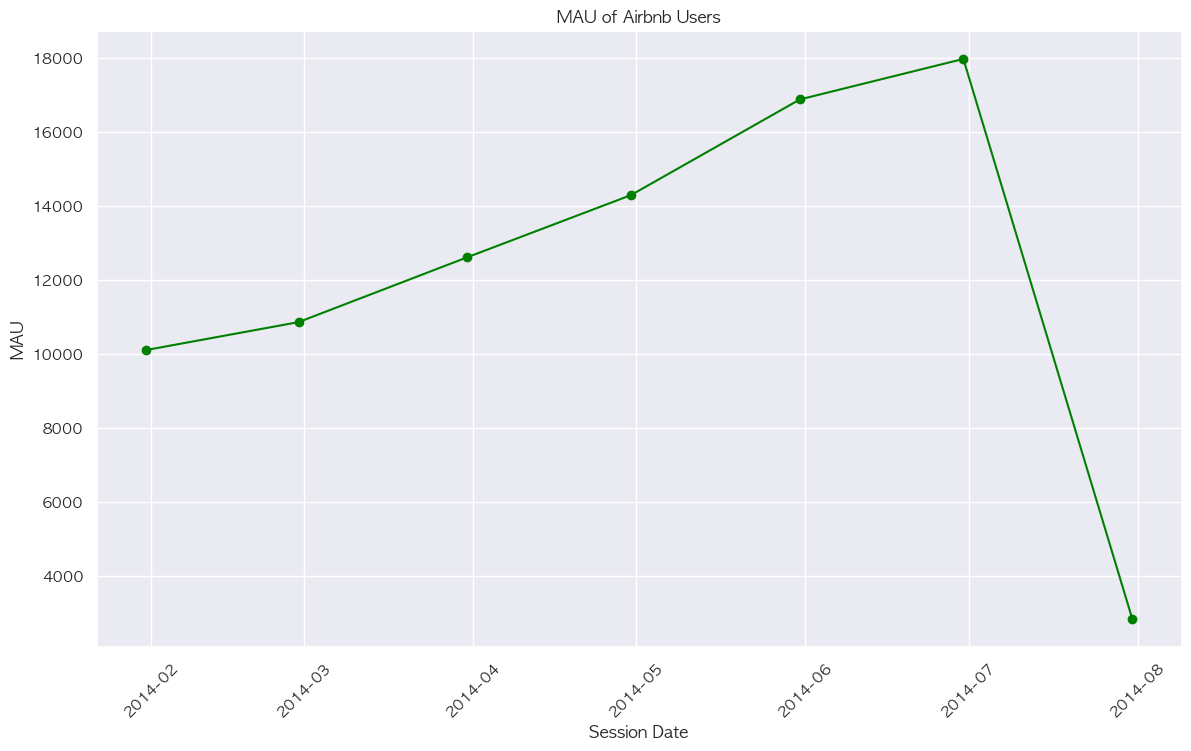

In [37]:
# MAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(mau['date'], mau['mau'], color='green', marker='o')
plt.xlabel('Session Date')
plt.ylabel('MAU')
plt.title('MAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

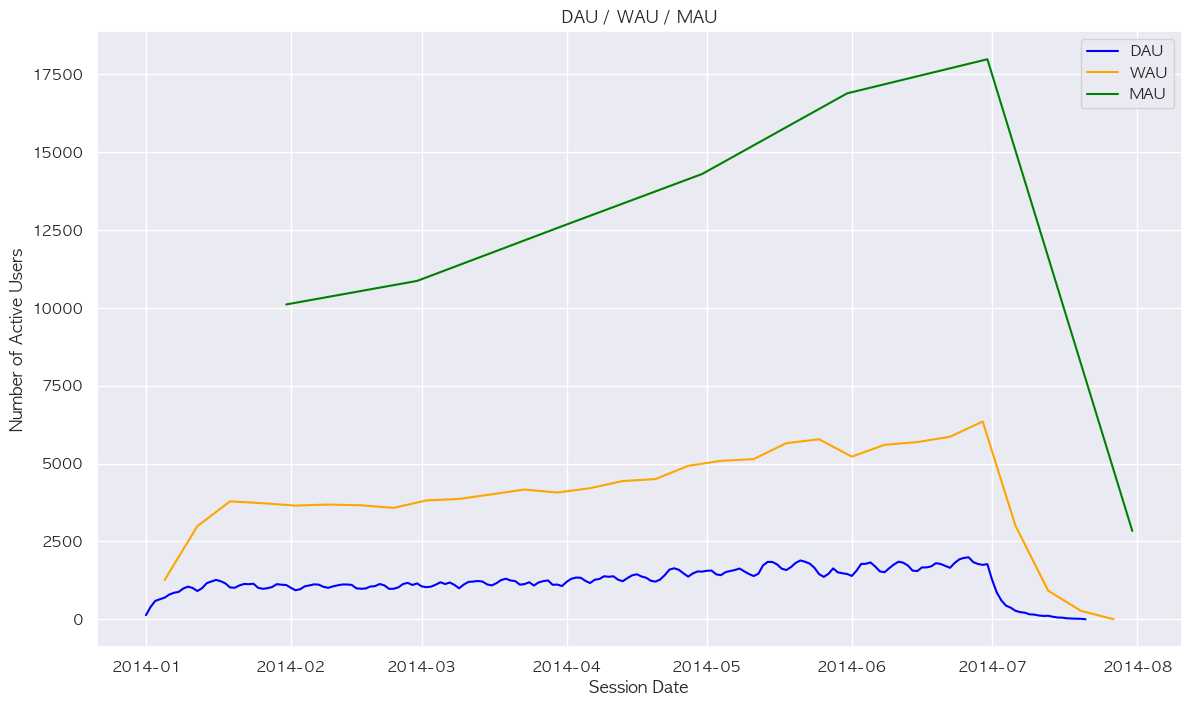

In [39]:
## 한 번에 시각화

# 시각화 위한 데이터 준비
dau.set_index('date', inplace=True)
wau.set_index('date', inplace=True)
mau.set_index('date', inplace=True)


plt.figure(figsize=(14, 8))

plt.plot(dau.index, dau['dau'], label='DAU', color='blue')
plt.plot(wau.index, wau['wau'], label='WAU', color='orange')
plt.plot(mau.index, mau['mau'], label='MAU', color='green')

plt.title('DAU / WAU / MAU')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend()
plt.show()

## 요일별/시간대별 사용자수

In [41]:
# 요일별, 시간대별 사용자수 구하기
# 요일별, 시간별로 그룹화 -> 각 그룹 내 고유한 사용자수 집계
week_hour_user = merged_df.groupby([merged_df['session_timestamp'].dt.hour, merged_df['session_timestamp'].dt.weekday])['user_id'].nunique()


# 그룹화된 데이터를 피벗테이블 형태로 변환(행: 시간, 열: 요일)
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user = week_hour_user.unstack()

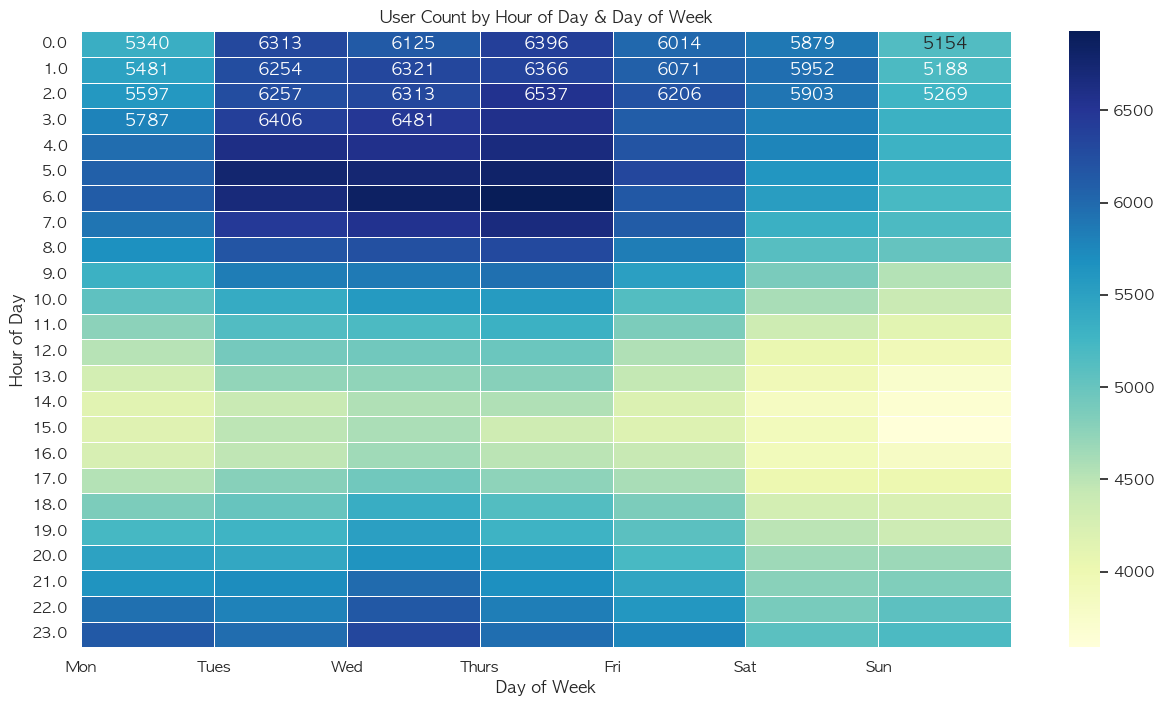

In [42]:
## 히트맵으로 시각화

plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('User Count by Hour of Day & Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

- 주로 평일 새벽시간과 밤 시간대에 유저 활동이 많다.
- 평일 중에서도 특히 화, 수, 목에 유저 활동이 몰려있는 것 같다.